In [19]:
from utils import connect_elasticsearch, retrieve_documents, generate_response, generate_responses_parallel
from rag_shap import compute_exact_shapley_values,  visualize_shapley_values

In [2]:
# Connect to Elasticsearch
es_client = connect_elasticsearch()

# Verify the connection
if es_client.ping():
    print("Connected to Elasticsearch!")
else:
    print("Failed to connect to Elasticsearch.")

Connected to Elasticsearch!


In [3]:
query = "Are explainability methods susceptible to class outliers?"

# Retrieve relevant documents
index_name = "arxiv_papers"
documents = retrieve_documents(es_client, index_name, query, top_k=3)

# Display the retrieved documents
for i, doc in enumerate(documents):
    print(f"Document {i+1}:")
    print(f"Title: {doc['title']}")
    print(f"Abstract: {doc['abstract']}")
    print("-" * 80)

Document 1:
Title: The Susceptibility of Example-Based Explainability Methods to Class
  Outliers
Abstract:   This study explores the impact of class outliers on the effectiveness of
example-based explainability methods for black-box machine learning models. We
reformulate existing explainability evaluation metrics, such as correctness and
relevance, specifically for example-based methods, and introduce a new metric,
distinguishability. Using these metrics, we highlight the shortcomings of
current example-based explainability methods, including those who attempt to
suppress class outliers. We conduct experiments on two datasets, a text
classification dataset and an image classification dataset, and evaluate the
performance of four state-of-the-art explainability methods. Our findings
underscore the need for robust techniques to tackle the challenges posed by
class outliers.

--------------------------------------------------------------------------------
Document 2:
Title: Algebraic Ad

In [18]:
documents[]

[{'id': '2204.03341',
  'submitter': 'Tung Kieu',
  'authors': 'Tung Kieu, Bin Yang, Chenjuan Guo, Christian S. Jensen, Yan Zhao,\n  Feiteng Huang, Kai Zheng',
  'title': 'Robust and Explainable Autoencoders for Unsupervised Time Series Outlier\n  Detection---Extended Version',
  'comments': 'This paper has been accepted by IEEE ICDE 2022',
  'journal-ref': None,
  'doi': None,
  'report-no': None,
  'categories': 'cs.LG cs.DB',
  'license': 'http://creativecommons.org/licenses/by-nc-sa/4.0/',
  'abstract': '  Time series data occurs widely, and outlier detection is a fundamental\nproblem in data mining, which has numerous applications. Existing\nautoencoder-based approaches deliver state-of-the-art performance on\nchallenging real-world data but are vulnerable to outliers and exhibit low\nexplainability. To address these two limitations, we propose robust and\nexplainable unsupervised autoencoder frameworks that decompose an input time\nseries into a clean time series and an outlier t

In [20]:
num_workers = 4  # Match OLLAMA_NUM_PARALLEL
response = generate_response(query, documents)

# Display the response
print("Response:")
print(response)

Response:
Yes, explainability methods are susceptible to class outliers. This is highlighted in the abstract "The Susceptibility of Example-Based Explainability Methods to Class Outliers". The study shows that current example-based explainability methods can be ineffective when faced with class outliers and attempts to suppress them are not sufficient.


In [21]:
num_workers = 4  # Match OLLAMA_NUM_PARALLEL
response = generate_response(query, documents[-1:])

# Display the response
print("Response:")
print(response)

Response:
Yes, example-based explainability methods are susceptible to class outliers. The study highlights that current example-based explainability methods, including those that attempt to suppress class outliers, have shortcomings and are not effective in handling the challenges posed by class outliers.


In [27]:
documents

[{'id': '2407.20678',
  'submitter': 'Ikhtiyor Nematov Mr',
  'authors': 'Ikhtiyor Nematov, Dimitris Sacharidis, Tomer Sagi, Katja Hose',
  'title': 'The Susceptibility of Example-Based Explainability Methods to Class\n  Outliers',
  'comments': 'arXiv admin note: text overlap with arXiv:2407.16010',
  'journal-ref': None,
  'doi': None,
  'report-no': None,
  'categories': 'cs.LG',
  'license': 'http://creativecommons.org/licenses/by/4.0/',
  'abstract': '  This study explores the impact of class outliers on the effectiveness of\nexample-based explainability methods for black-box machine learning models. We\nreformulate existing explainability evaluation metrics, such as correctness and\nrelevance, specifically for example-based methods, and introduce a new metric,\ndistinguishability. Using these metrics, we highlight the shortcomings of\ncurrent example-based explainability methods, including those who attempt to\nsuppress class outliers. We conduct experiments on two datasets, a te

In [25]:
num_workers = 4  # Match OLLAMA_NUM_PARALLEL
response = generate_response(query, documents)
# Display the response
print("Response:")
print(response)

Response:
Yes, according to the paper titled "The Susceptibility of Example-Based Explainability Methods to Class Outliers", example-based explainability methods for black-box machine learning models can be susceptible to class outliers. The study highlights the shortcomings of current example-based explainability methods, including those that attempt to suppress class outliers, and underscores the need for robust techniques to tackle the challenges posed by class outliers.


In [26]:
# Compute exact Shapley values with parallel LLM calls
shapley_values = compute_exact_shapley_values(query, documents, num_workers=num_workers)

# Display the Shapley values
for i, value in enumerate(shapley_values):
    print(f"Document {i+1} Shapley Value: {value:.4f}")

100%|██████████| 3/3 [10:15<00:00, 205.25s/it]

Document 1 Shapley Value: 0.7089
Document 2 Shapley Value: 0.8014
Document 3 Shapley Value: 0.8886


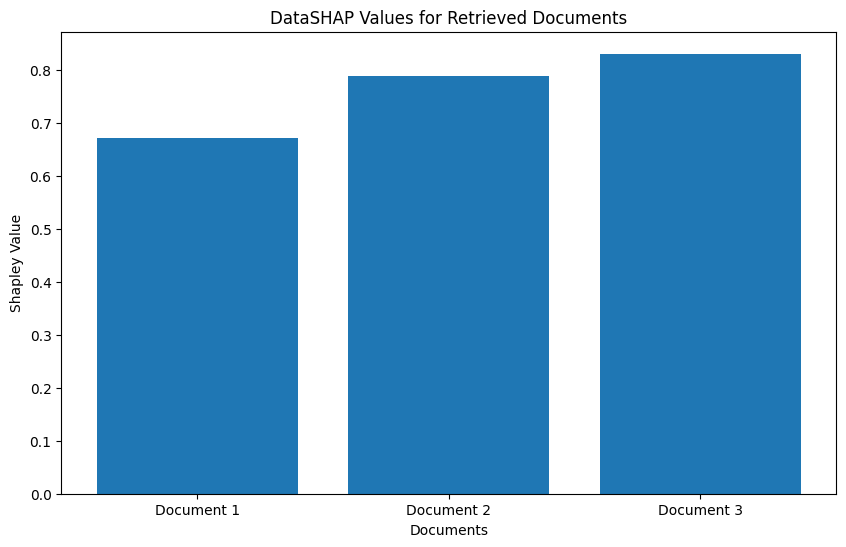

In [6]:
# Visualize the Shapley values
visualize_shapley_values(shapley_values, documents)